

## CS349 HW1 Group 8



### Task 1

Did you alter the Node data structure? If so, how and why?

Yes, we altered the Node data structure. We added two fields: attribute and is_leaf and introduced a helper method: add_child. 

The attribute field stores the feature or decision attribute associated with the node, which helps in decision-making during the tree traversal. The is_leaf field is a boolean that indicates whether the node is a leaf node, which helps when checking when to stop traversing the tree. The add_child function is a helper method that simplifies the process of adding children nodes to a parent when building the decision tree.

### Task 2

How did you handle missing attributes, and why did you choose this strategy?

To handle missing attributes in the dataset, we used an imputation strategy where missing values (denoted by ?) are replaced by the most common value for the corresponding attribute. We implemented this in our code using the preprocess function, which can operate in different modes: 'remove', 'impute', and 'keep'.

We decided to adopt the imputation strategy. For each attribute with missing values, we calculate the most common value across all examples. We then replace these values with the most common value. We chose this strategy because removing examples with missing attributes can lead to loss of data, which may result in fewer training examples. This method maintains the size of the dataset. By imputing the most common value in the corresponding attribute column, we preserve the distribution and make reasonable assumptions about the missing values while adding minimum bias to the dataset.

### Task 3

How did you perform pruning, and why did you choose this strategy?

We implemented error complexity pruning, a post-pruning technique that balances model complexity with performance. The method begins by fully constructing the decision tree to its full depth, then pruning the tree by removing branches and evaluating the pruned tree's accuracy on a validation set (independent from training). 

After the tree is built, we begin pruning from the leaf nodes. For each internal node, we calculate the error rate for the subtree starting from that node and compare it to the error rate if the node were replaced by a leaf node (the most common class label of the subtree). If pruning the node improves or maintains accuracy on the validation set, we replace the subtree with the single leaf node.

The algorithm generates several pruned versions of the original tree, with varying degrees of simplification. The version of the tree that performs best on the validation set is selected as the final model to ensure the generalization ability of the tree. 

We chose this strategy because error complexity pruning helps prevent overfitting by reducing the complexity of the tree while maintaining good performance on unseen data. The method evaluates the pruned versions of the tree on a validation set, which ensures that the chosen tree generalizes well to independent data from the training set. This is crucial for real-world scenarios where we aim to minimize errors on data outside of the training set.

Compared to other strategies, like critical value pruning, error complexity pruning is also more flexible. It allows for the exploration of various tree depths and sizes, finding the version that balances accuracy and simplicity.

### Task 4

In [7]:
import importlib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import ID3 as decision_tree
import experiment
import ID3
import parse
importlib.reload(experiment)

<module 'experiment' from '/Users/minghui/Documents/COMP_SCI 349/CS349---Group8/HW1/experiment.py'>

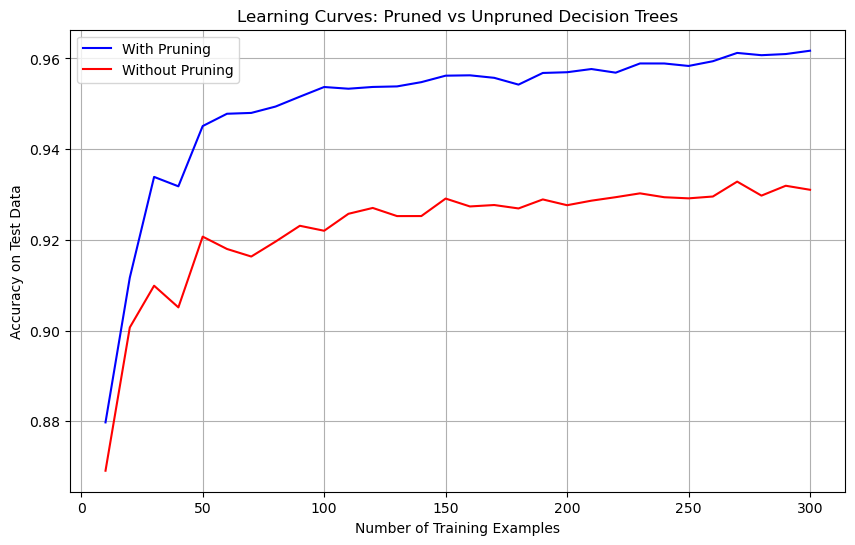

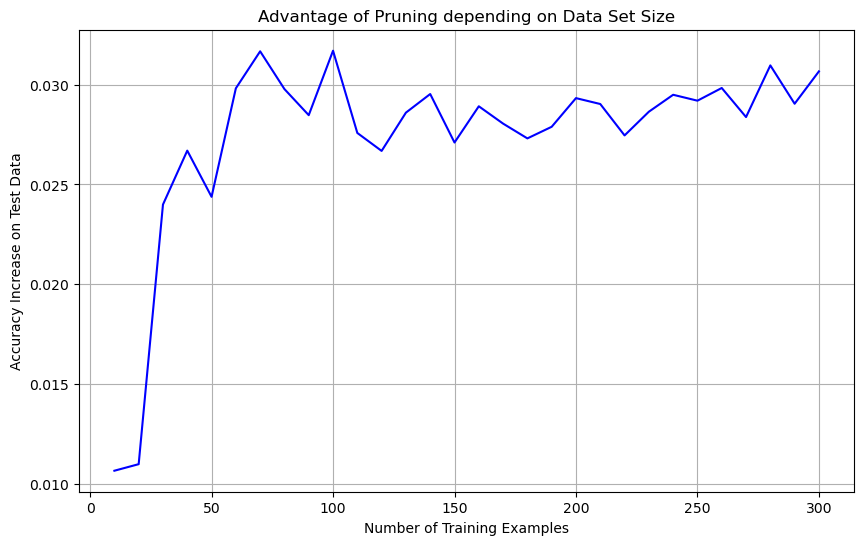

In [8]:
experiment.experiment()

(a) What is the general trend of both lines as training set size increases, and why does this make sense?

Looking at the first plot, both lines show an increasing trend as the number of training examples increases. The accuracy for both pruned and unpruned decision trees improves with more training data, which is expected since larger training sets provide more information, allowing the decision tree to make better predictions. This makes sense because as the number of training examples increases, the model has more data to learn from, which leads to more accurate generalizations and fewer errors. In addition, the pruned tree outperforms the unpruned tree in terms of accuracy, which makes sense because pruning the tree helps to simplify the model, reduce overfitting, and also reduce errors.



(b) How does the advantage of pruning change as the dataset size increases? Does this make sense, and why or why not?

The advantage is more prominent when the size of the dataset is small. This is shown in the second plot, as the accuracy with pruning for smaller datasets increases more rapidly compared to the unpruned tree. From small dataset sizes, the gap between pruning and not pruning increases until a size of around 50. The increase in accuracy slowly decreases and plateaus for pruning and unpruned as the number of training examples increases, the gap between the trees also stays similar. This makes sense because pruning helps to prevent overfitting which is a bigger risk for smaller datasets, as it is harder to generalize. Yet, as the dataset size increases, both the pruned and unpruned tree have enough data to improve accuracy, so the advantage of pruning diminishes.

### Task 5

In [7]:
train_data = parse.parse('./cars_train.data')
val_data = parse.parse('./cars_valid.data')
test_data = parse.parse('./cars_test.data')

tree = ID3.ID3(train_data, 'good')

train_accuracy = ID3.test(tree, train_data)
valid_accuracy = ID3.test(tree, val_data)
test_noprune = ID3.test(tree, test_data)

ID3.prune(tree, val_data)
train_prune = ID3.test(tree, train_data)
valid_prune = ID3.test(tree, val_data)
test_prune = ID3.test(tree, test_data)

print("Accuracy on training set before pruning: ", train_accuracy)
print("Accuracy on training set after pruning: ", train_prune)
print("\nAccuracy on validation set before pruning: ", valid_accuracy)
print("Accuracy on validation set after pruning: ", valid_prune)
print("\nTest accuracy before pruning: ", test_noprune)
print("Test accuracy after pruning: ", test_prune)

NameError: name 'parse' is not defined

The accuracy of the training set is less than 100 percent, which shows that the decision tree does not perfectly fit the training data. This happens because the available features are not sufficient to fully capture the patterns in the training data, or there may be inconsistencies or noise in the data.

The pruning of the tree using the validation set (cars_valid.data) reduced the complexity and overfitting of the decision tree. Pruning allows the decision tree to be more generalized when classifying unseen data and unknown datasets. Therefore, the classification accuracy for the training set decreased, but the classification accuracy for the validation and testing set improved. This is a trade-off between model complexity and generalization. The pruned tree performs better on validation and test data, showing that it is no longer overfitting to the training data.

### Task 6

In [6]:
candy_data = parse.parse('./candy.data')
candy_train = candy_data[:2*len(candy_data)//3]
candy_test = candy_data[len(candy_data)//3:]

tree_Q6 = ID3.ID3(candy_train, 0)
forest = ID3.construct_random_forest(candy_train, 0)

print("Accuracy on train candy.data with single tree with no pruning: ", ID3.test(tree_Q6, candy_train))
print("Accuracy on train candy.data with random forest: ", ID3.test_random_forest(forest, candy_train))
print("\n")
print("Accuracy on test candy.data with single tree with no pruning: ", ID3.test(tree_Q6, candy_test))
print("Accuracy on test candy.data with random forest: ", ID3.test_random_forest(forest, candy_test))


Accuracy on train candy.data with single tree with no prunning:  0.8928571428571429
Accuracy on train candy.data with random forest:  0.875


Accuracy on test candy.data with single tree with no prunning:  0.6842105263157895
Accuracy on test candy.data with random forest:  0.7192982456140351


When constructing our Random Forest classifier, we created multiple decision teams by running the ID3 algorithm on different subsets of the training data. By randomly sampling both examples and attributes from the original dataset, we create each subset. The random sampling of subsets helps introduce diversity among the trees, reducing bias and overfitting. A minimum size for the subset is also chosen to ensure that there is sufficient data to train each tree.

When using the training data, we observed that a single decision tree achieved higher accuracy. However, when evaluating the test data, the Random Forest outperformed the single tree. This is because the performance of a single decision tree is better on the training data as it may be overfitting, so it can capture specific patterns that do not generalize as well to unseen data. On the other hand, the Random Forest reduces overfitting by averaging out the individual trees’ predictions among the diverse collection of trees. This allows the forest model to be more generalized and perform better on the test set which was not used for training.

Nonetheless, there may be a limited improvement in accuracy due to the possible lack of diversity and small dataset sizes. The improvement with the Random Forest depends largely on the diversity among the trees, so with limitations in the dataset size, the forest may show similar performance to a single tree.